<a href="https://colab.research.google.com/github/Brunojp178/PI/blob/Semana-3/PI_Tarefa_4(Terceira_Semana_(ERE)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

# 1. Adição de Imagens

No vídeo abaixo, eu mostro uma maneira de se fazer adição de imagens (inserir uma imagem menor dentro de uma imagem maior), podendo inclusive combinar esse efeito com a transparência.

<a href="https://www.youtube.com/watch?v=60k962jJAmE"><img src="https://img.youtube.com/vi/60k962jJAmE/mqdefault.jpg"/></a>

Dito isso, faça um algoritmo que receba uma imagem e insira uma marca d'água sobre essa figura. Considere a imagem abaixo como referência.

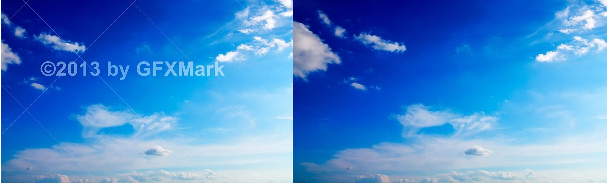

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving logo.png to logo.png


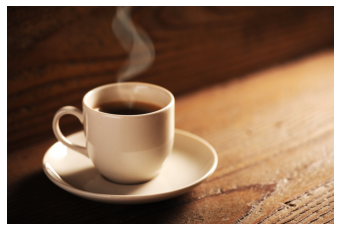

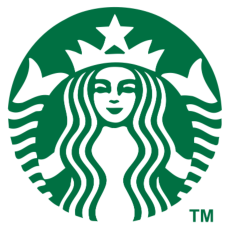

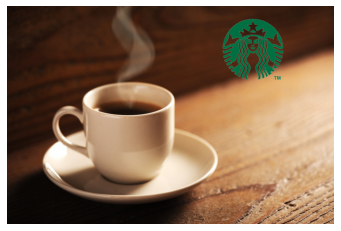

In [ ]:
#insira seu código aqui
import numpy as np
import cv2
from matplotlib import pyplot as plt

def main():
  # Load the images 
  img1 = imgLoad("coffee.jpg")
  img2 = imgLoad("logo.png")
  
  # Show the images and resize image 2
  imgShow(img1, False)
  img2 = imgResize(img2, 50)
  imgShow(img2, False) 
  
  # blend the images using image2 as a watermark
  img1 = imgBlending(img1, img2, 80, 1350, 50)
  # Show the result of the blending
  imgShow(img1, False)


def imgBlending(imgDest, imgAdd, y1, x1, percent):
  backH, backW, _ = imgDest.shape
  frontH, frontW, _ = imgAdd.shape
  if frontH > backH or frontW > backW: print("a Imagem de fundo é menor que a marca-d'agua")

  # recorta da imagem original a área onde a segunda imagem vai ser colocada (pasteImg)
  pasteImg = imgCrop(imgDest, y1, (y1 + frontH), x1, (x1 + frontW))

  # Remove fundo da imagem apagando todos os pixels brancos
  imgGrey = cv2.cvtColor(imgAdd, cv2.COLOR_RGB2GRAY)
  ret, maskFore = cv2.threshold(imgGrey, 250, 255, cv2.THRESH_BINARY)  
  
  backWithMask = cv2.bitwise_and(pasteImg, pasteImg, mask = maskFore)
  foreWithMask = cv2.bitwise_not(maskFore)
  foreWithMask = cv2.bitwise_and(imgAdd, imgAdd, mask = foreWithMask)

  combinedImage = cv2.add(foreWithMask, backWithMask)

  imgDest[y1:(y1 + frontH), x1:(x1+frontW)] = combinedImage
  return imgDest


def imgLoad(name):
  image = cv2.imread(name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def imgResize(image, scalePercent):
  width = int(image.shape[1] * scalePercent / 100)
  height = int(image.shape[0] * scalePercent / 100)
  image = cv2.resize(image, (width, height))
  return image

def imgCrop(image, y1, y2, x1, x2):
  crop = image[y1:y2, x1:x2]
  return crop

def imgShow(img, axis):
  imgplot = plt.imshow(img)
  if not axis: plt.axis('off')
  plt.show()

main()

#2. Rastreamento (Tracking)

Quando falamos do rastreamento de um objeto, estamos nos referindo a uma aplicação que "acompanha" o movimento de um objeto em um vídeo, marcando a posição dele tipicamente em caixas envolventes. Abaixo tem-se um exemplo:

<img src="https://i.pinimg.com/originals/41/36/f9/4136f909c378936cdf33f2cd975d081c.gif"/>

Nesse exercício, implemente o rastreio de um objeto com uma cor definida, nos moldes do exemplo do vídeo abaixo.

<a href="https://www.youtube.com/watch?v=M2wcIsMXPEA"><img src="https://img.youtube.com/vi/M2wcIsMXPEA/mqdefault.jpg"/></a>

In [ ]:
#Insira seu código aqui
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(True):
  # Recebe frames da webcam
  _, frame = cap.read()

  # Transformar canais de cor
  hsvFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

  # Intervalo de reconhecimento (Cor atual = Azul)
  lowerColor = np.array([70, 50, 0])
  higherColor = np.array([130, 255, 255])


  # Area do obj a ser reconhecido
  mask = cv2.inRange(hsvFrame, lowerColor, higherColor)

  # Pega contorno da forma analisada
  contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # Se existir contorno
  if contours:
        #retorna a área em pixels de um determinado contorno
        maxArea = cv2.contourArea(contours[0])
        index = 0
        i = 0
        for cnt in contours:
            #p pegar o contorno q tiver maior área
            if maxArea < cv2.contourArea(cnt):
                maxArea = cv2.contourArea(cnt)
                #pega identificador do maior contorno
                index = i
            i += 1

        #retorna um retângulo que envolve o contorno em questão
        x, y, w, h = cv2.boundingRect(contours[index])

        if maxArea > 80.0:
            # Se a area for maior que 80 desenha o retângulo vermelho com espessura 3
            cv2.rectangle(frame, (x,y), (x + w, y + h), (0, 0, 255), 3)

  cv2.imshow('frame', frame)
  cv2.imshow('mask', mask)


  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

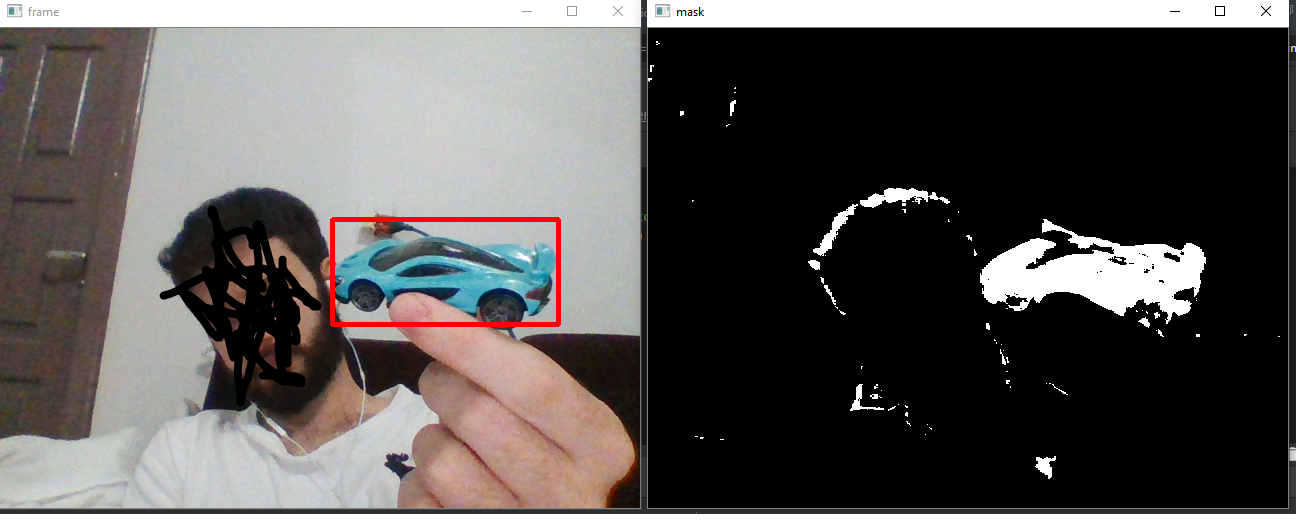

#3. Proposta do Trabalho Final

Acesse o SIGAA e no fórum "Proposta de Trabalho Final", você deve elaborar o conceito do seu trabalho final.

Essa proposta deverá constar de:

* Tema (Reconhecimento de Faces? Diagnóstico de Doenças por Imagem? Verificação de Qualidade em Linha de Montagem por Imagem? Astronomia e Machine Learning?)
* Problema a ser Resolvido (Se seu protótipo der certo, qual solução ele trará a sociedade? Para qual finalidade ele será usado?)
* Método a ser usado (Qual algoritmo você implementará para resolver o problema apontado?)

